# 学習に関するテクニック

## 今ここ
1. 学習
   1. データの前処理
   2. 誤差を求める（損失関数）
   3. 誤差を減らすために勾配の算出
   4. **パラメータの更新**　←　今ここ
2. 推論

## パラメータの更新

### SGD (確率的勾配降下法)


■SGDとは  
学習率$\eta$を勾配に乗算して、学習を進める。  
パラメータを更新する数式は

$$
W = W -  \eta \times \frac{\partial L}{\partial W}
$$

■SGDの欠点  
学習率が一定のため、無駄な学習が多くなる。

↓SGDを実装してみる。

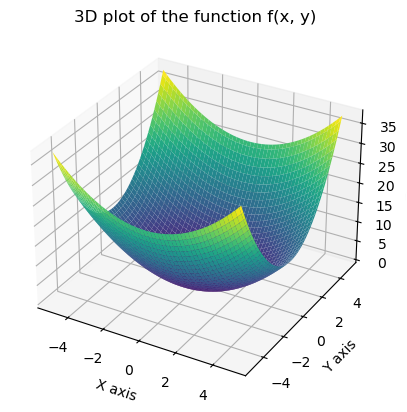

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# 2変数関数の定義
def f(x, y):
    return x**2 / 2 + y**2

# グリッドの作成
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# 3次元グラフの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# グラフのラベル
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D plot of the function f(x, y)')

plt.show()

### Momentum
直訳すると運動量・勢い  
勾配を転がるボールのように、速度・勢いがあるような学習ができる。  
↓数式

$$
v = \alpha{v} + \eta\frac{\partial L}{\partial W}
$$

$$
W = W + v
$$

■$\alpha{v}$  
物体が何も力を受けないときに徐々に減速する役割。  
空気抵抗のようなもので0.9のような値をせっていする。  

### AdaGrad
学習率に減衰を加える手法。  
学習はじめは高い学習率で学習をどんどん進ませて、  
学習が進んでいくと、学習率を落とし少しずつ学習率を進ませるようなイメージ。

$$
h = h + \frac{\partial L}{\partial W} \times \frac{\partial L}{\partial W}
$$

$$
W = W - \eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}
$$

### Adam
MomentumとAdaGradを足したようなやり方

### MNISTデータセットによる更新手法の比較

### 重みの初期値の考え方

### 隠れ層のアクティベーション